# Importing and analyzing data 

Import important libraries.

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

We will take data from our github repositories, which were downloaded from kaggle.

In [ ]:
url = 'https://raw.githubusercontent.com/maihadat/Disease-Prediction/topic/change_data_and-add_test_decision_tree/Data_sets/dataset.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,Severity,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,...,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell,Disease
0,0,13,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,1,11,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,2,10,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,3,8,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,4,13,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,5404,29,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,Dimorphic hemmorhoids(piles)
5405,5405,31,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,Cervical spondylosis
5406,5406,43,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,AIDS
5407,5407,16,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chicken pox


Drop redundant column.


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

The number of diseases.

**Check if there is null or nan value**

In [ ]:
sum(df.isna().sum())

0

In [ ]:
sum(df.isnull().sum())

0

Encode the label.

In [ ]:
encoder = LabelEncoder()
df["Disease"] = encoder.fit_transform(df["Disease"])

We can see that the data is quite clear and since it is a small dataset, it can lead to high accuracy.

**Train and test set split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:-1]
Y = df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
print("The number of datapoints in training set, test set:\n" + str(len(X_train)) + ", " + str(len(X_test)))

The number of datapoints in training set, test set:
4327, 1082


# KNN
Since KNN is very efficient in dealing with small datasets, we will implemnt KNN with diffent number of neighbors and distance measurements.

Firstly, we try with 5nn.

In [ ]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
start = time.time()
knn.fit(X_train, Y_train)
end = time.time()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
Y_pred = knn.predict(X_test)
print(accuracy_score(Y_test, Y_pred) * 100)

96.39556377079482


As expected, it have quite good accuracy.

Array storing the accuracy of knn with k from 1-60

In [ ]:
acc = []

Calculating accuracy for K values between 1 and 60 on the test set.

Max accuracy:  0.9639556377079482 at K = 3


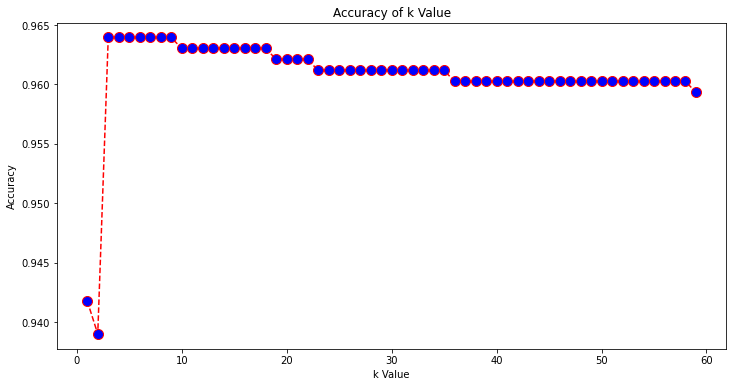

In [ ]:
for i in range(1, 60):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    acc.append(accuracy_score(Y_test, pred_i))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
print("Max accuracy: ",max(acc),"at K =",acc.index(max(acc))+1)

As we can see in the plot, if k is small enough, it will have very good accuracy. We can expect 1nn have the worst accuracy since dataset may have noises, outliers and 1nn is very sensitive to them. With large enough k, we can see mean error raise, but with a very small rate, and it can leaded to underfitting.

Calculating accuracy for p values in Minkowski distance between 1 and 10 on the test set.(with k=4)

Max accuracy:  0.9639556377079482 at p = 1


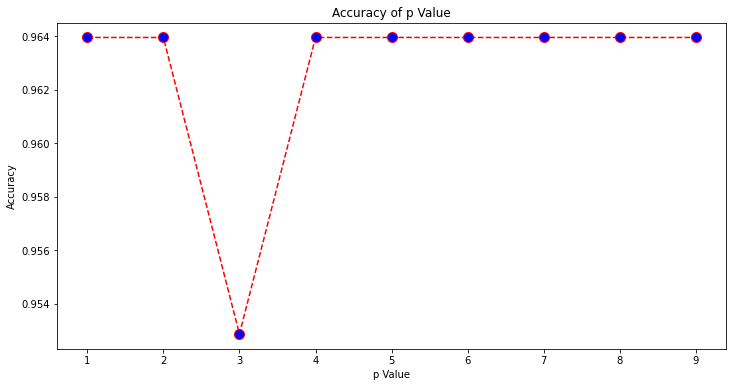

In [ ]:
acc = []
for i in range(1, 10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=4, p=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    acc.append(accuracy_score(Y_test, pred_i))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of p Value')
plt.xlabel('p Value')
plt.ylabel('Accuracy')
print("Max accuracy: ",max(acc),"at p =",acc.index(max(acc))+1)

We have observed the best accuracy p can be varied in depending on the dataset split randomness, but often be small.